### Description
This notebook describes how to load CIFAR10 or CIFAR100 datasets using the trailmet framework.

#### Installation of trailmet
Note that if the source code version of trailmet is used, then the path to the root directory needs to be added to the system path. 

In [1]:
# adding trailmet to the system path
import sys
sys.path.append("/Users/deepak.gupta/eff-dl/trailmet/")

In [2]:
# load the required packages
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from trailmet.datasets.classification import DatasetFactory

#### Specify the root data directory
This directory will be used to download (and process if needed) the required data. Any folders related to train/test etc. will be created at this path. Please adapt this path based on your system's address.

In [3]:
root_dir = "/Users/deepak.gupta/eff-dl/data_dir"

#### Loading CIFAR10 Dataset

##### Specify the transforms to be applied on the inputs and labels of the train, val and test splits
All the transforms to be applied on the different splits of the data can be specified using transforms function from the torchvision library.

In [4]:
train_transform = transforms.Compose(
[transforms.ToTensor()])

val_transform = transforms.Compose(
[transforms.ToTensor()])

test_transform = transforms.Compose(
[transforms.ToTensor()])

input_transforms = {
    'train': train_transform, 
    'val': val_transform, 
    'test': test_transform}

target_transforms = {
    'train': None, 
    'val': None, 
    'test': None}

##### Creating the CIFAR10 dataset with the specified control parameters
 - val_fraction defines the fraction of the training data from the original CIFAR10 to be seperated as validation set. Note that the test is preserved to be the same as the standard one.

In [5]:
cifar_dataset = DatasetFactory.create_dataset(name = 'CIFAR10', 
                                        root = root_dir,
                                        split_types = ['train', 'val', 'test'],
                                        val_fraction = 0.2,
                                        transform = input_transforms,
                                        target_transform = target_transforms
                                        )

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [6]:
print(cifar_dataset['info'])

{'train_size': 40000, 'val_size': 10000, 'test_size': 10000, 'note': 'Note that we use the CIFAR10 instance of torchvision for train and validation, due to which the length of these will be displayed as 50000 when len() is invoked.For accurate details, extract information from the info keyword in this dict '}


In [7]:
print('Train samples: ',cifar_dataset['info']['train_size'])
print('Val samples: ',cifar_dataset['info']['val_size'])
print('Test samples: ',cifar_dataset['info']['test_size'] )

Train samples:  40000
Val samples:  10000
Test samples:  10000


In [8]:
# Construct dataloader
train_loader = torch.utils.data.DataLoader(
        cifar_dataset['train'], batch_size=64, 
        sampler=cifar_dataset['train_sampler'],
        num_workers=0
    )
val_loader = torch.utils.data.DataLoader(
        cifar_dataset['val'], batch_size=64, 
        sampler=cifar_dataset['val_sampler'],
        num_workers=0
    )
test_loader = torch.utils.data.DataLoader(
        cifar_dataset['test'], batch_size=64, 
        sampler=cifar_dataset['test_sampler'],
        num_workers=0
    )

print('No. of training batches: ', len(train_loader))
print('No. of validation batches: ', len(val_loader))
print('No. of test batches: ', len(test_loader))

No. of training batches:  625
No. of validation batches:  157
No. of test batches:  157


Feature batch shape: torch.Size([64, 3, 32, 32])
Labels batch shape: torch.Size([64])


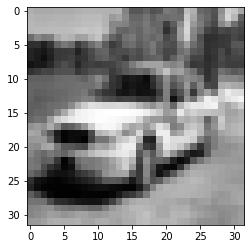

Label: 4


In [9]:
# Display image and label.
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[7,0,:,:].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

#### Loading CIFAR100 Dataset

In [10]:
cifar100_dataset = DatasetFactory.create_dataset(name = 'CIFAR100', 
                                        root = root_dir,
                                        split_types = ['train', 'val', 'test'],
                                        val_fraction = 0.15,
                                        transform = input_transforms,
                                        target_transform = target_transforms
                                        )

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [11]:
print(cifar100_dataset['info'])

{'train_size': 42500, 'val_size': 7500, 'test_size': 10000, 'note': 'Note that we use the CIFAR100 instance of torchvision for train and validation, due to which the length of these will be displayed as 50000 when len() is invoked.For accurate details, extract information from the info keyword in this dict '}


In [13]:
# Construct dataloader
train_loader100 = torch.utils.data.DataLoader(
        cifar100_dataset['train'], batch_size=32, 
        sampler=cifar100_dataset['train_sampler'],
        num_workers=0
    )
val_loader100 = torch.utils.data.DataLoader(
        cifar100_dataset['val'], batch_size=32, 
        sampler=cifar100_dataset['val_sampler'],
        num_workers=0
    )
test_loader100 = torch.utils.data.DataLoader(
        cifar100_dataset['test'], batch_size=32, 
        sampler=cifar100_dataset['test_sampler'],
        num_workers=0
    )

print('No. of training batches: ', len(train_loader100))
print('No. of validation batches: ', len(val_loader100))
print('No. of test batches: ', len(test_loader100))

No. of training batches:  1329
No. of validation batches:  235
No. of test batches:  313


Feature batch shape: torch.Size([32, 3, 32, 32])
Labels batch shape: torch.Size([32])


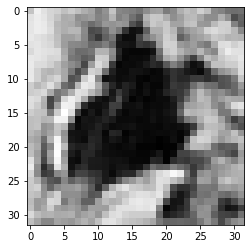

Label: 49


In [15]:
# Display image and label.
test_features, test_labels = next(iter(test_loader100))
print(f"Feature batch shape: {test_features.size()}")
print(f"Labels batch shape: {test_labels.size()}")
img = test_features[7,0,:,:].squeeze()
label = test_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")